In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier , NeighborhoodComponentsAnalysis,LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
data.drop(['Unnamed: 32','id'],inplace=True,axis=1)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
data = data.rename(columns= {"diagnosis":"target"})
data

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


B    357
M    212
Name: target, dtype: int64


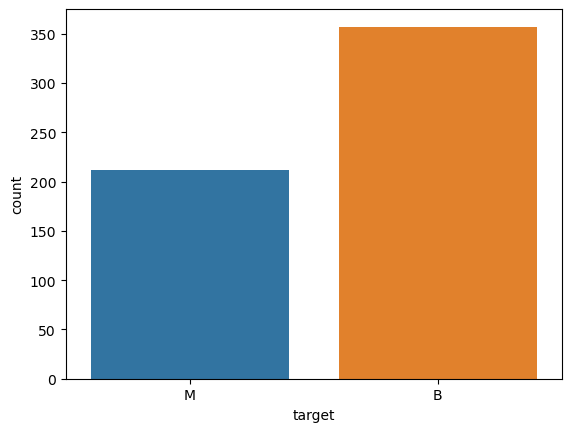

In [6]:
sns.countplot(data["target"])
print(data.target.value_counts())

In [7]:
data["target"] = [1 if i.strip() == "M" else 0 for i in data.target ]
data["target"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

In [8]:
print(len(data))

569


In [9]:
print(data.shape)

(569, 31)


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
data.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


""""""
    veriyi standardization yapcağız
""""""

In [12]:
data.isnull().sum()

target                     0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

*********** missing value 0 *************

## EDA

In [13]:
corr_matrix = data.corr()
corr_matrix

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


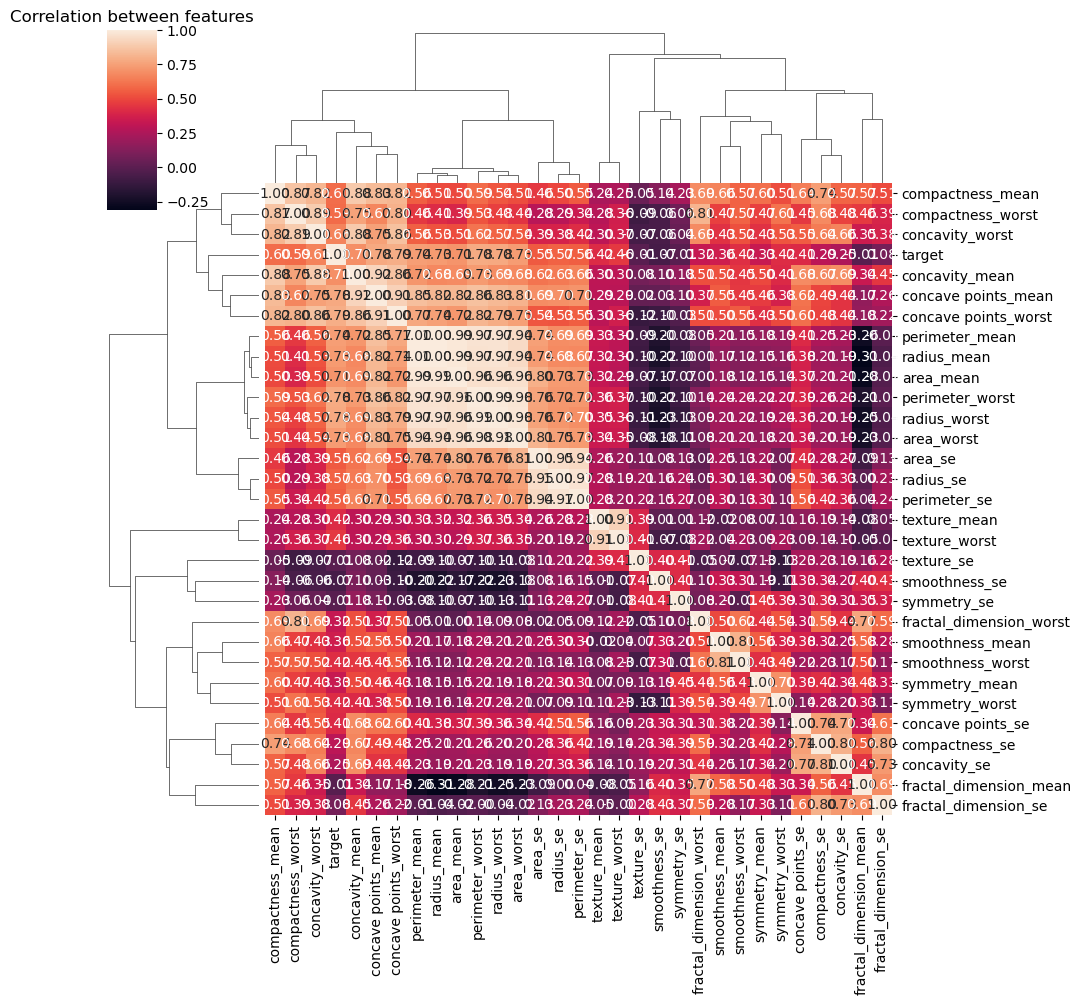

In [14]:
sns.clustermap(corr_matrix,annot=True,fmt =".2f")
plt.title("Correlation between features")
plt.show()

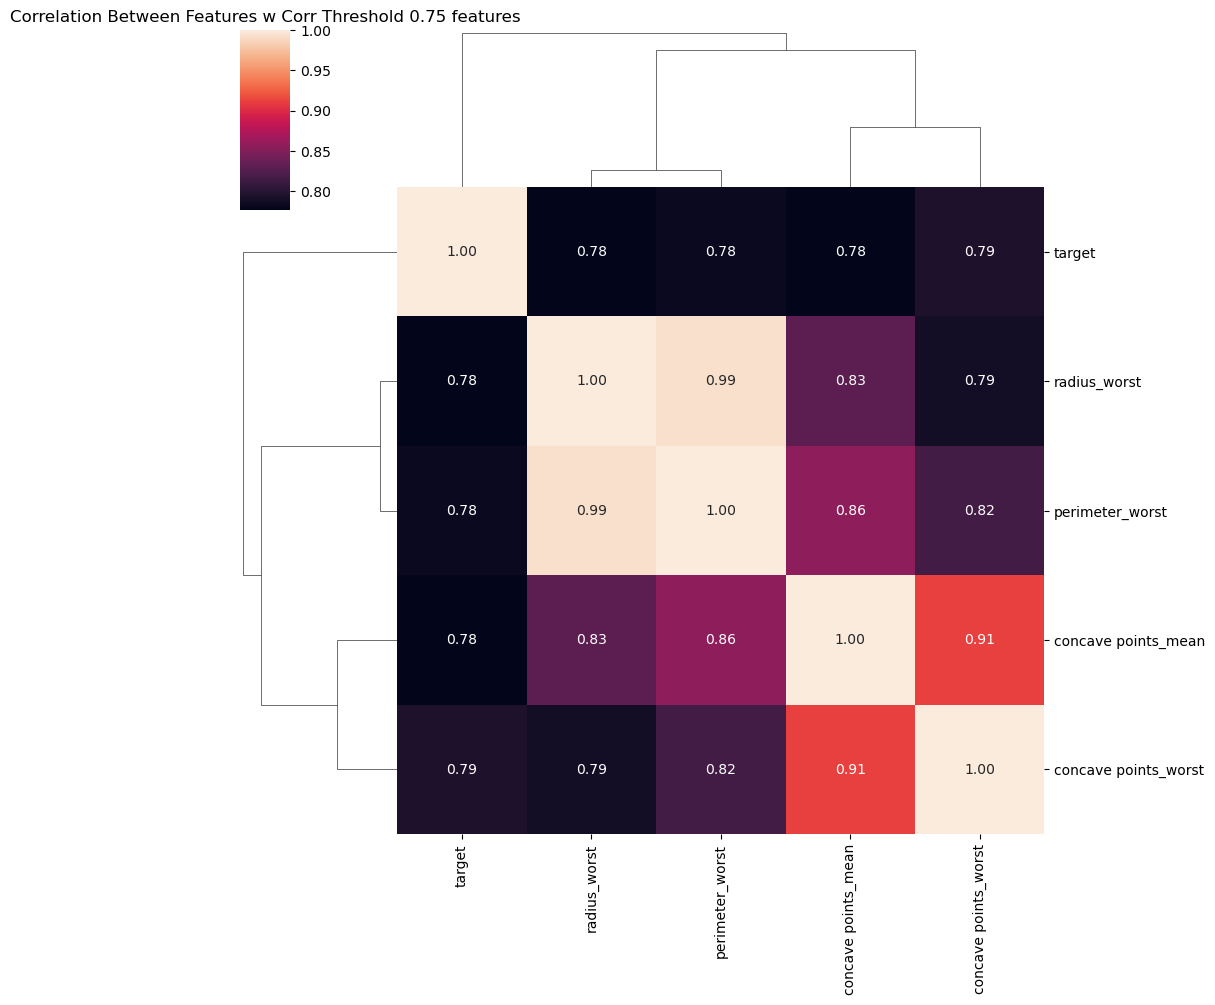

In [15]:
threshold = 0.75
filtre = np.abs(corr_matrix["target"])>threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(),annot=True,fmt =".2f")
plt.title("Correlation Between Features w Corr Threshold 0.75 features")
plt.show()

## there some correlated features

## Boxplot

In [16]:
data_melted = pd.melt(data,id_vars="target",value_name="value",var_name="features")

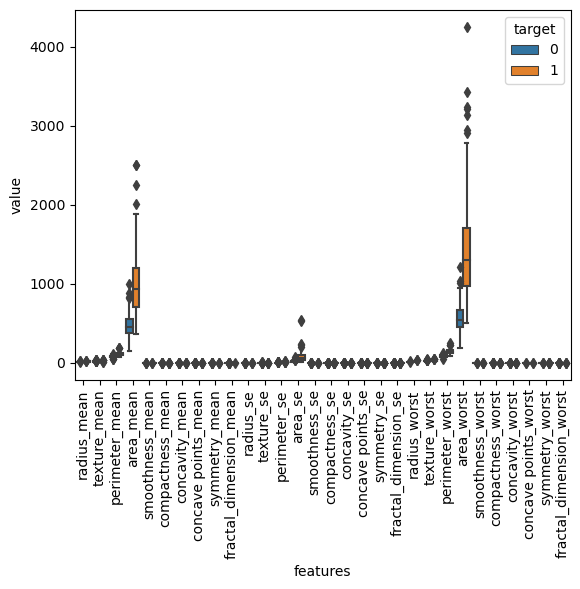

In [17]:
sns.boxplot(x="features",y="value",hue="target",data=data_melted)
plt.xticks(rotation=90)
plt.show()

## standartization

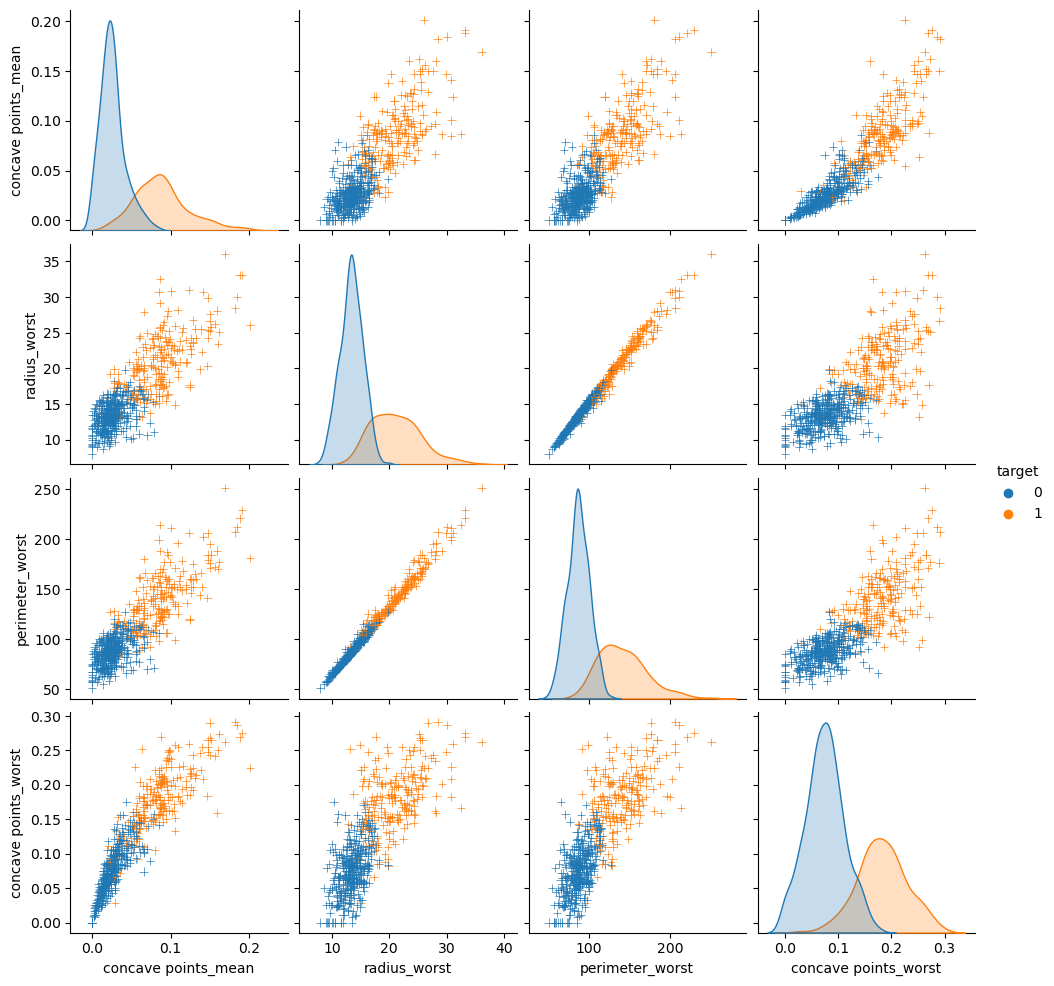

In [18]:
sns.pairplot(data[corr_features],diag_kind="kde",markers="+",hue="target")
plt.show()

## outlier

In [109]:
y = data.target
x = data.drop(["target"],axis=1)
columns = x.columns.tolist()

In [110]:
columns

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [111]:
clf = LocalOutlierFactor()
pred = clf.fit_predict(x)
pred

array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

In [112]:
X_score = clf.negative_outlier_factor_
outlier_score["score"] = X_score
print("min ",outlier_score.min())
print("max",outlier_score.max())

min  score   -3.134467
dtype: float64
max score   -0.946074
dtype: float64


In [113]:
print("———–Max-Min Normalizasyonları————–\n\n")
radius = (X_score.max()-X_score)/(X_score.max()-X_score.min())
radius


———–Max-Min Normalizasyonları————–




array([2.17678617e-01, 5.51586771e-02, 1.50219965e-02, 2.97414217e-01,
       5.65996402e-02, 3.77901591e-01, 3.18103796e-02, 1.39679012e-01,
       1.98520624e-01, 3.19084860e-01, 2.35461498e-02, 5.28755299e-02,
       8.38136774e-02, 1.42739724e-01, 1.03105448e-02, 6.72992490e-02,
       8.83330018e-02, 5.22847898e-02, 2.12300829e-01, 1.19603479e-02,
       1.62900649e-02, 3.28492841e-02, 2.51943345e-02, 2.78925821e-01,
       3.74121732e-01, 9.06491936e-02, 1.08054436e-01, 5.05485014e-02,
       7.81642778e-02, 9.16308358e-03, 1.63742430e-02, 4.80501870e-01,
       2.78482337e-02, 2.72974494e-02, 3.13434246e-02, 1.90169546e-02,
       1.71601360e-02, 2.04734512e-01, 5.88266998e-01, 6.59762289e-02,
       9.21643344e-02, 1.68594628e-01, 1.56630642e-02, 2.15385074e-01,
       1.54156480e-01, 1.62195395e-02, 1.71943912e-01, 1.73463515e-01,
       6.72403195e-02, 1.12335429e-02, 1.22062211e-02, 5.16892213e-02,
       1.26261539e-02, 3.80947925e-02, 4.17713173e-02, 2.49723489e-02,
      

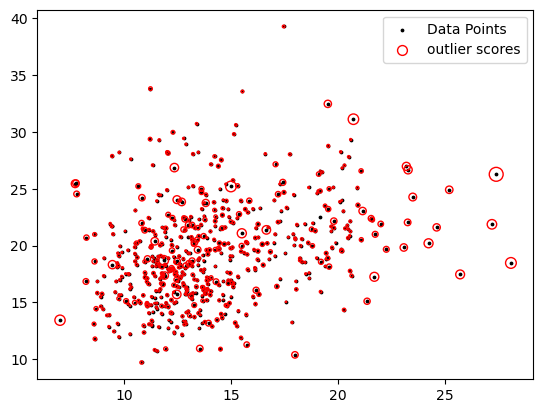

In [114]:
plt.figure()
plt.scatter(x.iloc[:,0],x.iloc[:,1],color = "k",s = 3,label = "Data Points")
plt.scatter(x.iloc[:,0],x.iloc[:,1],s=100*radius,edgecolors="r",facecolors = "none",label ="outlier scores")
plt.legend()
plt.show()

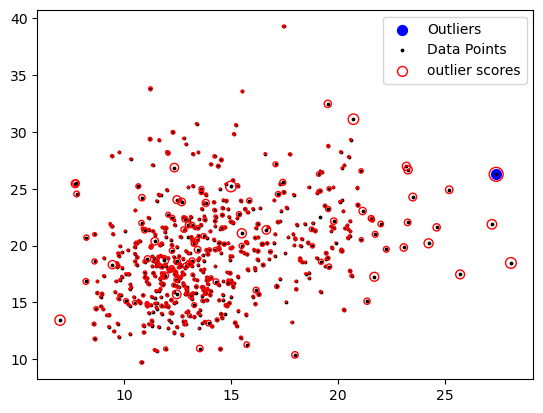

In [116]:
threshold = -2.5
filtre = outlier_score["score"]<threshold
outlier_index = outlier_score[filtre].index.tolist()
plt.figure()
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color = "blue",s = 50 ,label = "Outliers")
plt.scatter(x.iloc[:,0],x.iloc[:,1],color = "k",s = 3,label = "Data Points")
plt.scatter(x.iloc[:,0],x.iloc[:,1],s=100*radius,edgecolors="r",facecolors = "none",label ="outlier scores")
plt.legend()
plt.show()

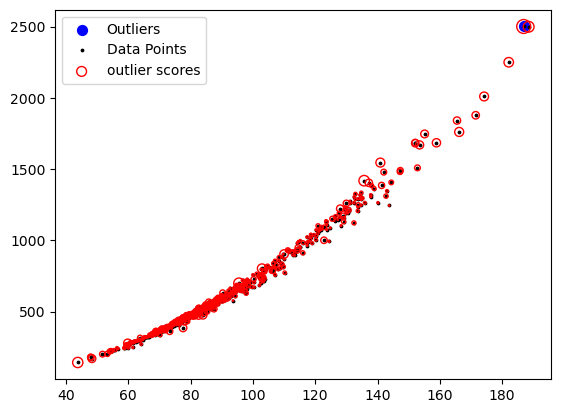

In [118]:
threshold = -2.5
filtre = outlier_score["score"]<threshold
outlier_index = outlier_score[filtre].index.tolist()
plt.figure()
plt.scatter(x.iloc[outlier_index,2],x.iloc[outlier_index,3],color = "blue",s = 50 ,label = "Outliers")
plt.scatter(x.iloc[:,2],x.iloc[:,3],color = "k",s = 3,label = "Data Points")
plt.scatter(x.iloc[:,2],x.iloc[:,3],s=100*radius,edgecolors="r",facecolors = "none",label ="outlier scores")
plt.legend()
plt.show()

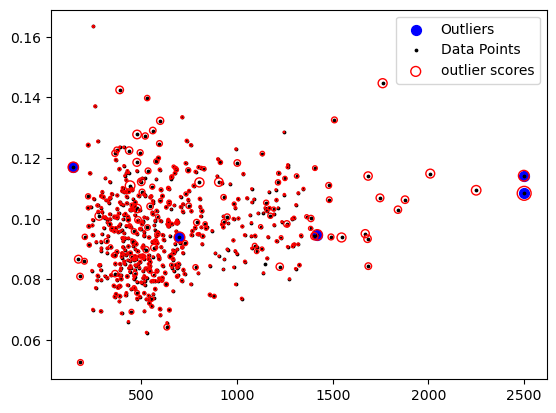

In [120]:
threshold = -2.0
filtre = outlier_score["score"]<threshold
outlier_index = outlier_score[filtre].index.tolist()
plt.figure()
plt.scatter(x.iloc[outlier_index,3],x.iloc[outlier_index,4],color = "blue",s = 50 ,label = "Outliers")
plt.scatter(x.iloc[:,3],x.iloc[:,4],color = "k",s = 3,label = "Data Points")
plt.scatter(x.iloc[:,3],x.iloc[:,4],s=100*radius,edgecolors="r",facecolors = "none",label ="outlier scores")
plt.legend()
plt.show()

## drop outliers 

In [105]:
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

In [106]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [121]:
test_size = 0.3
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=test_size,random_state=42)

In [124]:
print("X train",X_train.shape)
print("X test",X_test.shape)
print("Y train",Y_train.shape)
print("T test",Y_test.shape)

X train (398, 30)
X test (171, 30)
Y train (398,)
T test (171,)


## Standartization

In [125]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
X_train_df = pd.DataFrame(X_train,columns=columns)
X_train_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.123490,-0.296801,-0.170507,-0.208616,-1.201680,-0.773170,-0.762312,-0.933241,-1.229949,-0.948166,...,-0.197620,-0.506748,-0.307910,-0.273576,-1.507424,-0.449260,-0.572239,-0.840822,-0.856362,-0.765748
1,-0.228268,-0.657951,-0.253775,-0.296503,-1.804637,-0.587616,-0.091985,-0.542684,-1.419985,-0.612491,...,-0.422917,-0.458495,-0.465287,-0.438127,-1.273017,0.027042,0.318045,-0.377067,-1.341582,-0.414807
2,0.145534,-1.230564,0.245833,-0.010242,0.519184,1.570006,0.732320,0.386583,1.054201,1.574228,...,0.036022,-1.192272,0.203869,-0.127445,-0.024877,0.770802,0.272612,-0.047627,-0.089971,0.488264
3,-0.358532,-0.672207,-0.400937,-0.400014,-1.203862,-0.970650,-0.634704,-0.654992,0.096572,-0.827986,...,-0.502189,-0.583287,-0.501000,-0.493386,-0.959895,-0.663496,-0.470142,-0.493515,0.226547,-0.802899
4,-0.157472,0.967224,-0.208843,-0.241538,-0.254695,-0.700630,-0.750349,-0.637469,-0.518248,-0.642882,...,-0.195534,0.596414,-0.296107,-0.266734,-0.442374,-0.656085,-0.835138,-0.659802,-0.387208,-0.800613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-1.497494,-1.073749,-1.379543,-1.160029,0.135881,0.973654,-0.025866,-0.523567,0.368583,3.748516,...,-1.367290,-1.636531,-1.355982,-1.048088,-0.481514,-0.036959,-0.638602,-1.034066,-1.010604,1.421056
394,-0.718174,-0.197010,-0.704330,-0.689902,1.326521,-0.031346,-0.223452,-0.360813,-0.007761,0.350328,...,-0.656559,0.624700,-0.661404,-0.631799,1.610316,0.113949,0.095984,0.124773,-0.123711,0.424820
395,0.032261,-0.555784,-0.080644,-0.075809,-2.303586,-1.496809,-1.039653,-1.120156,-1.099533,-1.229967,...,-0.287322,-0.807912,-0.391138,-0.346027,-2.004940,-1.338808,-1.173282,-1.261790,-0.682839,-1.276726
396,-0.055526,0.109492,-0.046842,-0.168160,0.730110,0.195463,0.315536,0.429860,-0.499617,0.383481,...,0.157015,0.880940,0.197816,-0.022013,1.284147,0.725664,0.706523,1.079240,0.475584,1.255302


In [129]:
X_train_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,...,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,2.608187e-16,-5.810539e-16,-6.058805e-16,2.041918e-16,-1.896863e-17,-1.087907e-16,-1.737862e-16,-1.497964e-16,7.400557e-16,2.945717e-16,...,6.058805e-16,-1.980549e-16,-3.057298e-16,-1.991707e-16,8.828784e-16,-1.439385e-16,1.246909e-16,8.926416e-17,-2.807637e-16,1.506333e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,...,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.836464e+00,-2.245111e+00,-1.810311e+00,-1.365377e+00,-2.433051e+00,-1.640911e+00,-1.132915e+00,-1.286097e+00,-2.370161e+00,-1.754890e+00,...,-1.587373e+00,-2.243853e+00,-1.600220e+00,-1.154748e+00,-2.197162e+00,-1.446868e+00,-1.370635e+00,-1.784161e+00,-2.117613e+00,-1.628809e+00
25%,-6.863161e-01,-7.102232e-01,-6.781539e-01,-6.517481e-01,-7.572809e-01,-7.800619e-01,-7.523426e-01,-7.367012e-01,-6.980367e-01,-6.905392e-01,...,-6.701191e-01,-7.380288e-01,-6.906849e-01,-6.320618e-01,-7.587574e-01,-6.855591e-01,-7.760495e-01,-7.829110e-01,-6.511070e-01,-7.077340e-01
50%,-2.551700e-01,-1.090984e-01,-2.587218e-01,-3.167308e-01,-9.722838e-02,-2.350839e-01,-3.369099e-01,-3.804602e-01,-5.620170e-02,-1.849553e-01,...,-2.737620e-01,-5.832825e-02,-2.911130e-01,-3.407646e-01,-2.705181e-02,-2.683733e-01,-2.159212e-01,-2.283327e-01,-1.213010e-01,-1.927549e-01
75%,5.419902e-01,5.692460e-01,5.510809e-01,3.839945e-01,6.191923e-01,5.332330e-01,5.017380e-01,6.776427e-01,5.679340e-01,4.618745e-01,...,5.048709e-01,6.496585e-01,5.428353e-01,3.147198e-01,6.187627e-01,6.232624e-01,5.931956e-01,7.297391e-01,4.394337e-01,4.691161e-01
max,3.945850e+00,4.780684e+00,3.967339e+00,5.137153e+00,4.904988e+00,4.068820e+00,4.357306e+00,4.055859e+00,4.608979e+00,4.803888e+00,...,4.120586e+00,3.999076e+00,4.353182e+00,5.915678e+00,3.767380e+00,4.640507e+00,3.241075e+00,2.535233e+00,6.033124e+00,5.113359e+00


## Boxplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se'),
  Text(15, 0, 'compactness_se'),
  Text(16, 0, 'concavity_se'),
  Text(17, 0, 'concave points_se'),
  Text(18, 0, 'symmetry_se'),
  Text(19, 0, 'fractal_dimension_se'),
  Text(20, 0, 'radius_worst'),
  Text(21, 0, 'texture_worst'),
  Text(22, 0, 'perimeter_worst'),
  Text(23, 0, 'area_worst'),
  Text(24, 0, 'smoothness_worst'),
  Text(25, 0, 'compactness_worst'),
  Text(26, 0, 'concavity_

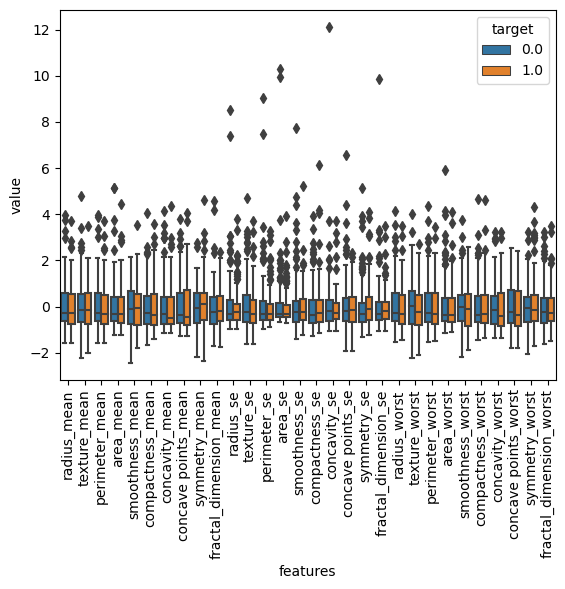

In [133]:
X_train_df["target"] = Y_train
data_melted = pd.melt(X_train_df,id_vars="target",
                     var_name = "features",
                     value_name = "value")
plt.figure()
sns.boxplot(x="features",y="value",hue ="target",data=data_melted)
plt.xticks(rotation = 90)

## Pairplot

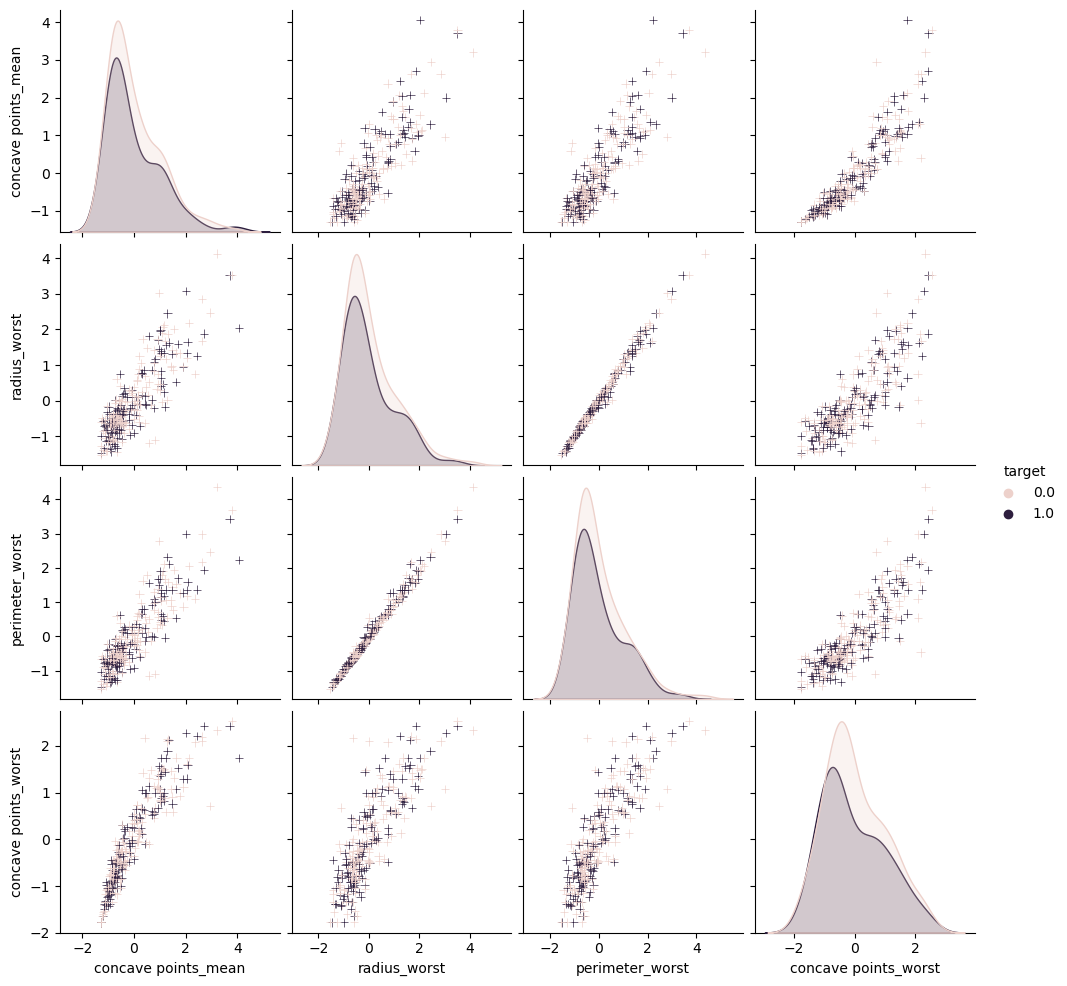

In [134]:
sns.pairplot(X_train_df[corr_features],diag_kind="kde",markers="+",hue="target")
plt.show()

In [138]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
score = knn.score(X_test,Y_test)
print("Score",score)
print("Basic Knn Accuracy",acc)

Score 0.9532163742690059
Basic Knn Accuracy 0.9532163742690059


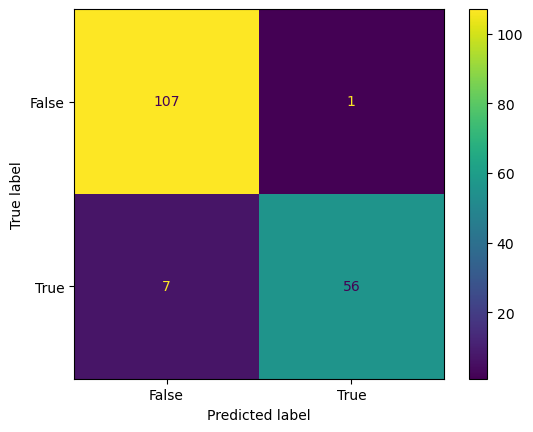

In [137]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

## Choose Best Parameters

In [145]:
def KNN_Best_Param(x_train,x_test,y_train,y_test):
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn,param_grid,cv=10,scoring="accuracy")
    grid.fit(x_train,y_train)
    
    print("Best training score: {} with parameters: {}".format(grid.best_score_,grid.best_params_))
    print("--------------------------------------------------------------------------------------")
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train,y_train)
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test,y_pred_test)
    cm_train = confusion_matrix(y_train,y_pred_train)
    
    acc_test = accuracy_score(y_test,y_pred_test)
    acc_train = accuracy_score(y_train,y_pred_train)
    print("Test Score: {},Train Score: {}".format(acc_test,acc_train))
    print("--------------------------------------------------------------------------------------")
    
    print("CM test:",
          cm_test)
    print("CM train: ",
          cm_train)
    
    return grid

grid = KNN_Best_Param(X_train,X_test,Y_train,Y_test)


Best training score: 0.9648076923076923 with parameters: {'n_neighbors': 8, 'weights': 'distance'}
--------------------------------------------------------------------------------------
Test Score: 0.9590643274853801,Train Score: 1.0
--------------------------------------------------------------------------------------
CM test: [[105   3]
 [  4  59]]
CM train:  [[249   0]
 [  0 149]]


## Model overfiting oldu 2 ihtimal var ya model complexityi düşürcem yada regularization  yapmam gerek olacak biz model complexity düşürme yolunu deniyeceğiz

In [149]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
score = knn.score(X_test,Y_test)
print("Score",score)
print("Basic Knn Accuracy",acc)

Score 0.9532163742690059
Basic Knn Accuracy 0.9532163742690059


In [152]:
y_pred = knn.predict(X_train)
acc1 = accuracy_score(Y_train,y_pred)
print("train acc ",acc1)

train acc  0.9698492462311558


## PCA

In [172]:
x = [2.4,0.6,2.1,2,3,2.5,1.9,1.1,1.5,1.2]
y = [2.5,0.7,2.9,2.2,3.0,2.3,2.0,1.1,1.6,0.8]

In [173]:
x = np.array(x)
y = np.array(y)

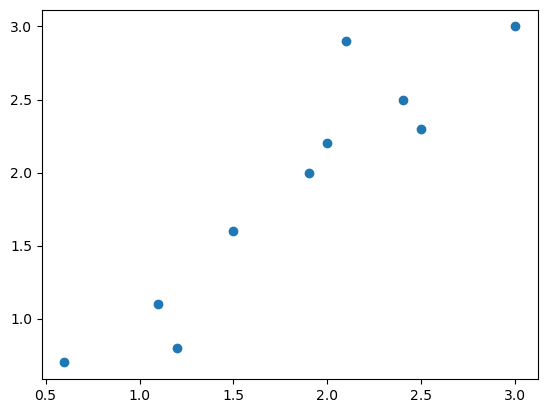

In [174]:
plt.scatter(x,y)

In [175]:
x_m = np.mean(x)
y_m = np.mean(y)

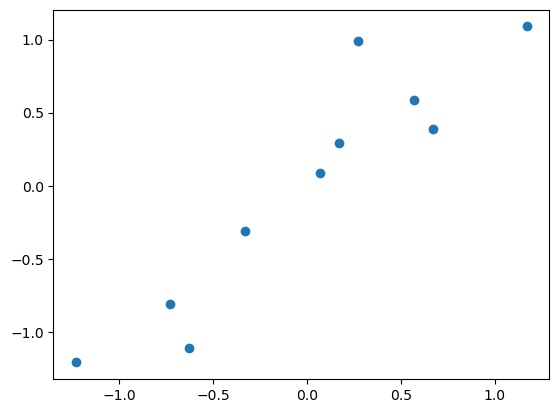

In [176]:
x = x-x_m
y = y-y_m

plt.scatter(x,y)

In [177]:
c = np.cov(x,y)
c

array([[0.53344444, 0.56411111],
       [0.56411111, 0.68988889]])

In [178]:
from numpy import linalg as LA

In [179]:
w,v = LA.eig(c)
w

array([0.04215805, 1.18117528])

In [180]:
v

array([[-0.75410555, -0.65675324],
       [ 0.65675324, -0.75410555]])

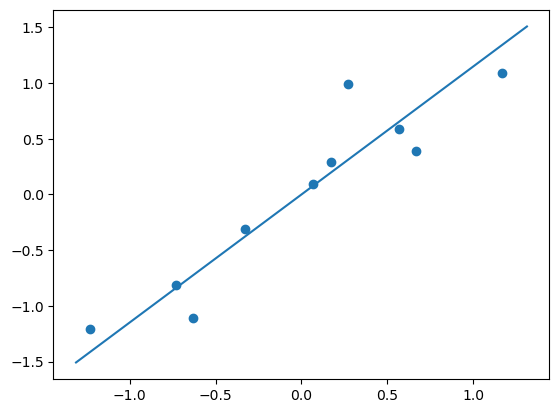

In [181]:
p1 = v[:,1]
p2 = v[:,0]
plt.scatter(x,y)
plt.plot([-2*p1[0],2*p1[0]],[-2*p1[1],2*p1[1]])
plt.show()